# Credit Card Fraud Detection using Machine Learning Algorithms

# Step 1: Import Libraries
    

Import all packages necessary for data manipulation and data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Step 2: Load and Explore Data

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In summary:the data represents

Time: Time elapsed since the first transaction.

V1-V28: Anonymized features resulting from a PCA transformation.

Amount: The transaction amount.

Class: Target variable, where 1 represents fraud and 0 represents non-fraud.

It's worth noting that due to privacy concerns, the original features underwent PCA transformation, and their actual meanings are not disclosed. The focus is often on building a model to detect fraudulent transactions based on the available information without revealing sensitive details about the individuals involved.


# Step 3: Explore Data

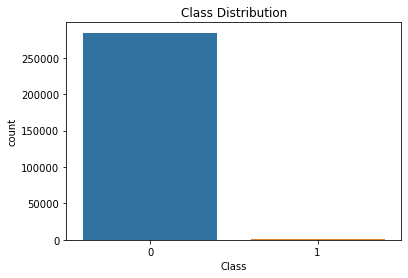

In [3]:
# Explore basic statistics of the dataset
data.describe()

# Check for missing values
data.isnull().sum()

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


# Step 4: Preprocess Data

StandardScaler(): Standardizes the 'Amount' column to have zero mean and unit variance.
train_test_split(): Splits the data into training and testing sets.

In [4]:
# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Build and Train the Model

In [ ]:
# Create a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


# Step 6: Evaluate the Model

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy is the ratio of correctly predicted instances to the total instances. In this case, the accuracy is extremely high, indicating that the model is correctly predicting the class (fraud or non-fraud) for the vast majority of transactions. However, accuracy can be misleading in imbalanced datasets, where one class dominates the other. In fraud detection, the dataset is often highly imbalanced, with non-fraudulent transactions significantly outnumbering fraudulent ones.

Confusion matrix 

True Positives (TP): 75 instances of fraud were correctly predicted as fraud.
    
True Negatives (TN): 56862 instances of non-fraud were correctly predicted as non-fraud.
    
False Positives (FP): 2 instances of non-fraud were incorrectly predicted as fraud.
    
False Negatives (FN): 23 instances of fraud were incorrectly predicted as non-fraud.

Classification Report:

Precision (for class 1): 97% - Out of all instances predicted as fraud, 97% are actually fraud. This indicates a low number of false positives.
    
Recall (for class 1): 77% - Out of all actual instances of fraud, the model captured 77% of them. This indicates a higher number of false negatives.
    
F1-score (for class 1): 86% - The harmonic mean of precision and recall for class 1.

Summary:
    
The model has an exceptionally high accuracy, but given the imbalanced nature of the dataset, accuracy alone might not be the most informative metric.

The model performs well in terms of precision, indicating a low false positive rate.

The recall is lower, suggesting that there is room for improvement in capturing more instances of fraud (reducing false negatives).